In [8]:
import numpy as np
from datetime import datetime, timedelta

import plotting
from environment import Environment

In [9]:
california_lon_range = (-126, -116)
california_lat_range = (32, 40)
p_sanfrancisco = (-122.75, 37.75)
p_losangeles = (-118.5, 33.75)

land_filepath = '../data/basemaps/ne_50m_land.shp'
boat_filepath = '../data/polars/Sunfast40.pol'
weather_dirpath = '../data/weather'

### Single Route Plot

In [12]:
datecycle = datetime(2024, 4, 6, 6)
tf = 24*10
dt = 12
portpair = 'sfla'
# title = 'San Francisco to Los Angeles'
lon_range = california_lon_range
lat_range = california_lat_range

# forecast_env = Environment(land_filepath, boat_filepath, weather_dirpath, 'forecast', datecycle, lon_range, lat_range, tf=tf, dt=dt)
historical_env = Environment(land_filepath, boat_filepath, weather_dirpath, 'historical', lon_range, lat_range, datecycle, tf=tf, dt=dt)
route = np.loadtxt(f'output/routes/{portpair}.historical.{datecycle.strftime('%Y%m%d%H')}.csv', delimiter=',')

route_distance: 374.54 nm
route time (historical): 2 days, 10:32:15.102260


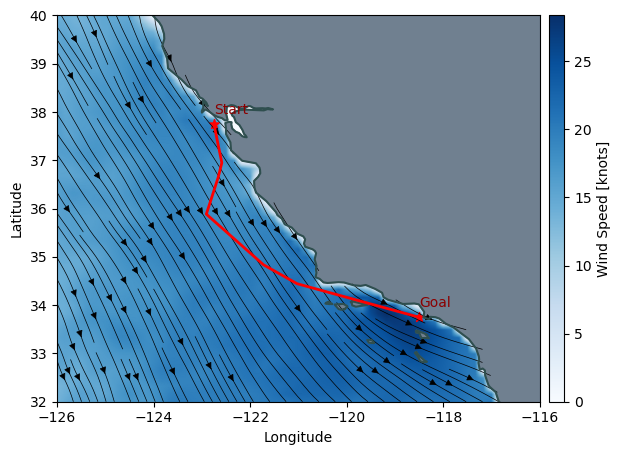

In [13]:
route_distance = historical_env.distance_route(route)
# forecast_route_duration = forecast_env.time_route(route)
historical_route_duration = historical_env.time_route(route)

plotting.plot(historical_env, 0, route=route);

print(f'route_distance: {route_distance:.2f} nm')
# print(f'route time (forecast): {timedelta(hours=forecast_route_duration)}')
print(f'route time (historical): {timedelta(hours=historical_route_duration)}')

### Animate Route

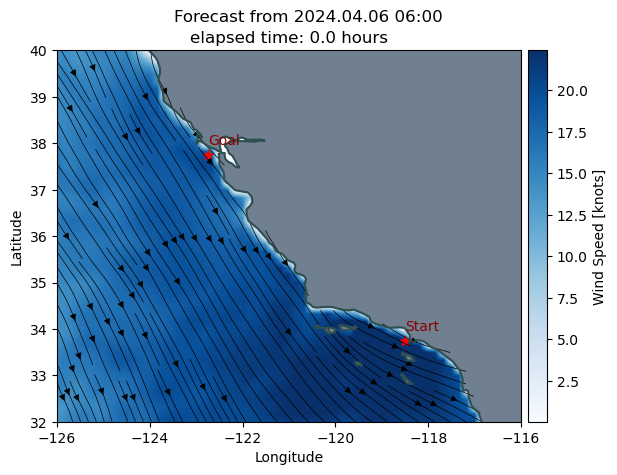

In [3]:
datecycle = datetime(2024, 4, 6, 6)
tf = 24*10
dt = 12
portpair = 'lasf'
lon_range = california_lon_range
lat_range = california_lat_range
region = 'california'

forecast_env = Environment(land_filepath, boat_filepath, weather_dirpath, 'forecast', datecycle, lon_range, lat_range, tf=tf, dt=dt)
historical_env = Environment(land_filepath, boat_filepath, weather_dirpath, 'historical', datecycle, lon_range, lat_range, tf=tf, dt=dt)
route = np.loadtxt(f'output/routes/test_{portpair}_{datecycle.strftime('%Y%m%d%H')}.csv', delimiter=',')

forecast_route_duration = forecast_env.time_route(route)
historical_route_duration = historical_env.time_route(route)

# v_range = (np.min([forecast_env.weather.df['ws'].min(), historical_env.weather.df['ws'].min()]),
#            np.max([forecast_env.weather.df['ws'].max(), historical_env.weather.df['ws'].max()]))

plotting.animate(forecast_env, forecast_route_duration, 2,
                 title=f'Forecast from {datecycle.strftime('%Y.%m.%d %H:%M')}',
                 route=route,
                 filepath=f'output/animations/{region}.forecast.{datecycle.strftime('%Y%m%d%H')}.test.gif')

### Animate Weather

In [4]:
datecycle = datetime(2024, 4, 6, 6)
tf = 24*10
dt = 12
lon_range = california_lon_range
lat_range = california_lat_range
region = 'california'

forecast_env = Environment(land_filepath, boat_filepath, weather_dirpath, 'forecast', datecycle, lon_range, lat_range, tf=tf, dt=dt)
historical_env = Environment(land_filepath, boat_filepath, weather_dirpath, 'historical', datecycle, lon_range, lat_range, tf=tf, dt=dt)

v_range = (np.min([forecast_env.weather.df['ws'].min(), historical_env.weather.df['ws'].min()]),
           np.max([forecast_env.weather.df['ws'].max(), historical_env.weather.df['ws'].max()]))

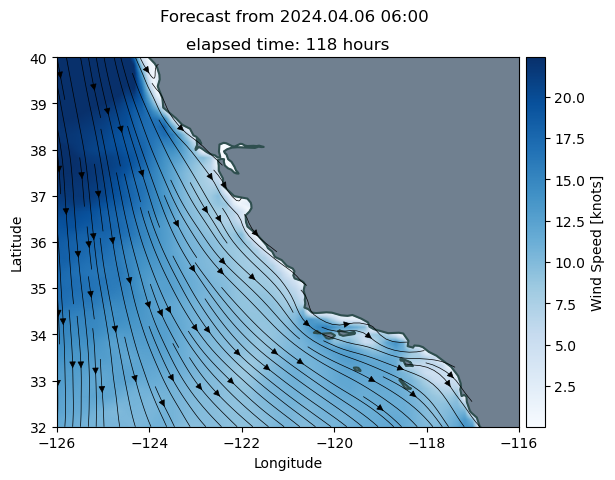

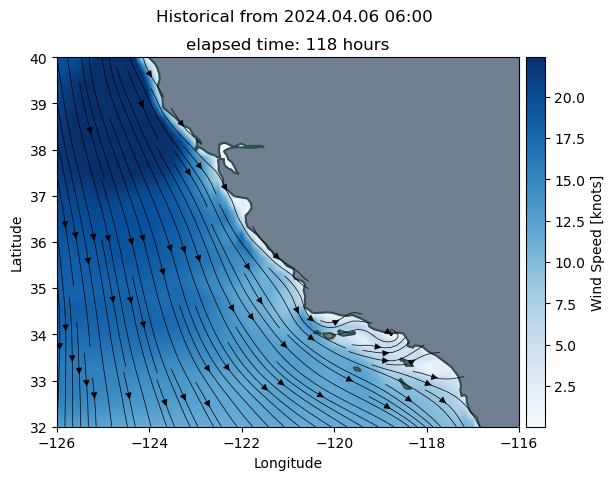

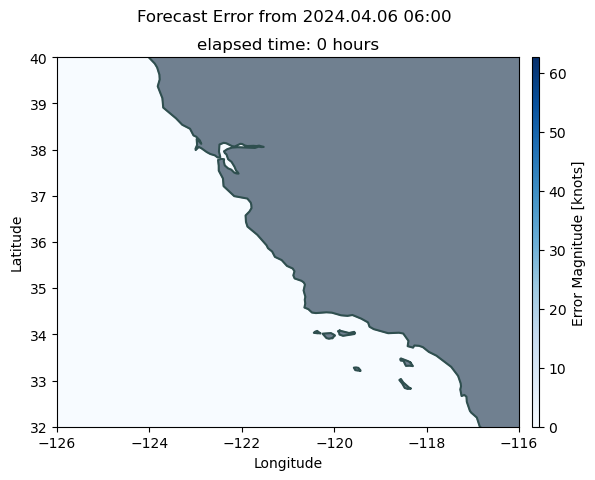

In [4]:
n_days = 5

plotting.animate(forecast_env, n_days*24, 2,
                 title=f'Forecast from {datecycle.strftime('%Y.%m.%d %H:%M')}',
                 filepath=f'output/animations/{region}.forecast.{datecycle.strftime('%Y%m%d%H')}.{n_days}day.gif',
                 v_range=v_range)

plotting.animate(historical_env, n_days*24, 2,
                 title=f'Historical from {datecycle.strftime('%Y.%m.%d %H:%M')}',
                 filepath=f'output/animations/{region}.historical.{datecycle.strftime('%Y%m%d%H')}.{n_days}day.gif',
                 v_range=v_range)

plotting.animate_delta(forecast_env, historical_env, n_days*24, 2,
                       title=f'Forecast Error from {datecycle.strftime('%Y.%m.%d %H:%M')}',
                       filepath=f'output/animations/{region}.delta.{datecycle.strftime('%Y%m%d%H')}.{n_days}day.gif')